In [13]:
using DifferentialEquations, ModelingToolkit, Plots

@parameters t σ α
@variables x(t) y(t) # x is the State Variable; y the differentiation factor (aka bifurcation parameter)
@derivatives D' ~ t


eqs = [ D(x) ~ y*x-x^3, D(y) ~ α]
noiseeqs = [σ*x, σ*y] # add states (LISI)

potential = SDESystem(eqs, noiseeqs, t, [x,y], [α,σ])

initval = [x => -5.0,y => -5.0] # modify X start -5 (LISI)

tspan = (0.0, 30.0);
params = [α => 0.5, σ => 0.1]
prob = SDEProblem(potential, initval, tspan, params, noise = WienerProcess(0.0, 0.0)); # modify noise to 2D

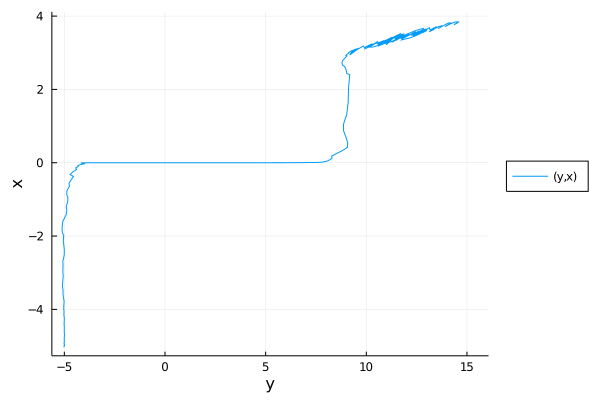

In [14]:
sol = solve(prob)

plot(sol, vars = (y, x), legend = :outerright)

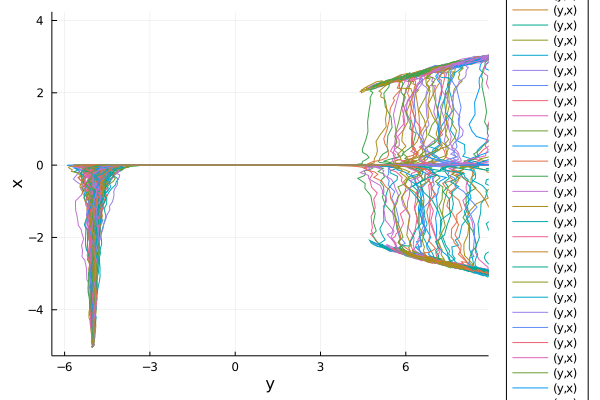

In [15]:
for i in 1:99
    sol = solve(prob);
    plot!(sol, vars = (y,x))
end

sol = solve(prob);
    plot!(sol, vars = (y,x), legend = :outerright)